# TIME SERIES

In [340]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import and read file

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import boxcox
from scipy.special import inv_boxcox
 
import fbprophet
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [342]:
 dataset=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/OSUN UNEMPLOYMENT RATE/data.xlsx')
print(dataset)

    Date  ECFF  ECFM  CFFF  CFFM  ...         MP    SV    IE        ARC    PI
0   2006   183   308    15   162  ...   7.000000  22.0  0.39  18.000000  57.0
1   2005   190   318    16   167  ...   7.000000  25.0  0.33  27.000000  32.4
2   2004   201   338    18   170  ...  57.000000  46.0  0.03  16.000000  32.4
3   2003   189   318    17   160  ...   1.000000  47.0  0.03  21.000000  32.4
4   2002   177   297    16   150  ...  15.000000  12.0  0.03  51.000000  32.4
5   2001   181   303    16   153  ...  74.000000   3.0  0.03  31.000000  32.4
6   2000   328   329    29   166  ...  51.000000  62.0  0.03  17.000000  32.4
7   1999   296   296    26   149  ...  27.000000  37.0  0.03  31.571429  32.4
8   1998   186   313    16   165  ...  21.000000  38.5  0.03  33.000000  32.4
9   1997   177   298    15   157  ...  43.638889  40.0  0.03  34.428571  32.4
10  1996   151   253    13   133  ...  46.588889  41.5  0.03  35.857143  32.4

[11 rows x 21 columns]


In [343]:
print(dataset.columns)

Index(['Date', 'ECFF', 'ECFM', 'CFFF', 'CFFM', 'CFPEF', 'CFPEM', 'CFUFF',
       'CFUFM', 'UER', 'PD', 'GO', 'HS', 'HM', 'RF', 'TP', 'MP', 'SV', 'IE',
       'ARC', 'PI'],
      dtype='object')


In [344]:
dataset1=pd.concat((dataset['Date'],dataset['GO']),  axis=1)
print(dataset1)

    Date       GO
0   2006  11956.0
1   2005  13953.0
2   2004  11481.0
3   2003   8959.0
4   2002   8721.5
5   2001   7575.2
6   2000   6428.9
7   1999   5282.6
8   1998   4136.3
9   1997   2990.0
10  1996   1843.7


In [345]:
dataset2=pd.concat((dataset1,dataset['PD'], dataset['IE'],dataset['PI'],dataset['UER'],dataset['CFPEF'],dataset['TP'],dataset['MP']), axis=1)
print(dataset2)

    Date       GO    PD    IE    PI   UER  CFPEF            TP         MP
0   2006  11956.0  46.1  0.39  57.0  27.6      2  4.127793e+06   7.000000
1   2005  13953.0  22.7  0.33  32.4  12.6      2  3.999800e+06   7.000000
2   2004  11481.0  22.7  0.03  32.4   6.5      1  3.875775e+06  57.000000
3   2003   8959.0  22.7  0.03  32.4   7.2      1  3.755569e+06   1.000000
4   2002   8721.5  22.7  0.03  32.4   2.7      1  3.639143e+06  15.000000
5   2001   7575.2  22.7  0.03  32.4   1.9      1  3.416959e+06  74.000000
6   2000   6428.9  22.7  0.03  32.4   1.2      1  3.326872e+06  51.000000
7   1999   5282.6  22.7  0.03  32.4   0.4      1  3.190976e+06  27.000000
8   1998   4136.3  22.7  0.03  32.4   1.0      2  3.055081e+06  21.000000
9   1997   2990.0  22.7  0.03  32.4   7.5      2  2.919185e+06  43.638889
10  1996   1843.7  22.7  0.03  32.4   5.7      2  2.783289e+06  46.588889


In [346]:
print(dataset2.dtypes)

Date       int64
GO       float64
PD       float64
IE       float64
PI       float64
UER      float64
CFPEF      int64
TP       float64
MP       float64
dtype: object


In [347]:
dataset=dataset2

# DATA PRE-PROCESSING

In [348]:
dataset['Date']=pd.to_datetime(dataset['Date'], format='%Y')
print(dataset)

         Date       GO    PD    IE    PI   UER  CFPEF            TP         MP
0  2006-01-01  11956.0  46.1  0.39  57.0  27.6      2  4.127793e+06   7.000000
1  2005-01-01  13953.0  22.7  0.33  32.4  12.6      2  3.999800e+06   7.000000
2  2004-01-01  11481.0  22.7  0.03  32.4   6.5      1  3.875775e+06  57.000000
3  2003-01-01   8959.0  22.7  0.03  32.4   7.2      1  3.755569e+06   1.000000
4  2002-01-01   8721.5  22.7  0.03  32.4   2.7      1  3.639143e+06  15.000000
5  2001-01-01   7575.2  22.7  0.03  32.4   1.9      1  3.416959e+06  74.000000
6  2000-01-01   6428.9  22.7  0.03  32.4   1.2      1  3.326872e+06  51.000000
7  1999-01-01   5282.6  22.7  0.03  32.4   0.4      1  3.190976e+06  27.000000
8  1998-01-01   4136.3  22.7  0.03  32.4   1.0      2  3.055081e+06  21.000000
9  1997-01-01   2990.0  22.7  0.03  32.4   7.5      2  2.919185e+06  43.638889
10 1996-01-01   1843.7  22.7  0.03  32.4   5.7      2  2.783289e+06  46.588889


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



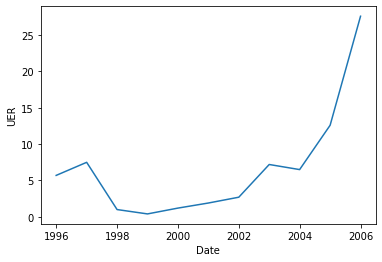

In [349]:
sns.lineplot(dataset['Date'], dataset['UER'])

In [350]:
 dataset['UER'], lam = boxcox(dataset['UER'])

In [351]:
dataset['UER']=(dataset['UER'])
print(dataset ['UER'])

0     3.861325
1     2.843034
2     2.037230
3     2.158658
4     1.038605
5     0.660594
6     0.183813
7    -0.879826
8     0.000000
9     2.207433
10    1.882921
Name: UER, dtype: float64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



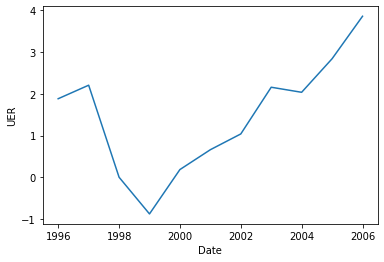

In [352]:
 
sns.lineplot(dataset['Date'], dataset['UER'])

In [353]:
print(dataset.Date)

0    2006-01-01
1    2005-01-01
2    2004-01-01
3    2003-01-01
4    2002-01-01
5    2001-01-01
6    2000-01-01
7    1999-01-01
8    1998-01-01
9    1997-01-01
10   1996-01-01
Name: Date, dtype: datetime64[ns]


# FEATURE SELECTION

In [354]:
dataset = dataset.rename(columns={'Date': 'ds', 'UER': 'y'})
print(dataset.ds)

0    2006-01-01
1    2005-01-01
2    2004-01-01
3    2003-01-01
4    2002-01-01
5    2001-01-01
6    2000-01-01
7    1999-01-01
8    1998-01-01
9    1997-01-01
10   1996-01-01
Name: ds, dtype: datetime64[ns]


In [355]:
 
model=fbprophet.Prophet()
 
 
model.fit(dataset)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


In [356]:
forecast = model.make_future_dataframe(periods=1 * 20, freq='Y')
 
forecast =model.predict(forecast)

In [357]:
print(forecast)

           ds     trend  ...  multiplicative_terms_upper      yhat
0  1996-01-01  0.405523  ...                         0.0  0.110633
1  1997-01-01  0.631292  ...                         0.0  0.772192
2  1998-01-01  0.856443  ...                         0.0  0.843807
3  1999-01-01  1.081595  ...                         0.0  0.923636
4  2000-01-01  1.306746  ...                         0.0  1.011856
5  2001-01-01  1.532515  ...                         0.0  1.673415
6  2002-01-01  1.757666  ...                         0.0  1.745030
7  2003-01-01  1.982818  ...                         0.0  1.824859
8  2004-01-01  2.207969  ...                         0.0  1.913079
9  2005-01-01  2.433738  ...                         0.0  2.574638
10 2006-01-01  2.658889  ...                         0.0  2.646253
11 2006-12-31  2.883424  ...                         0.0  2.229642
12 2007-12-31  3.108575  ...                         0.0  2.352904
13 2008-12-31  3.334344  ...                         0.0  2.91

In [358]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


Text(0.5, 1.0, 'forecast')

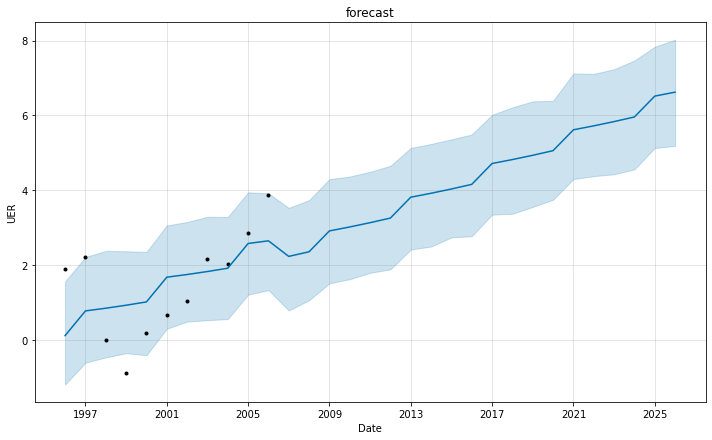

In [359]:
model.plot(forecast, xlabel = 'Date', ylabel = 'UER')
plt.title('forecast')

Text(0.5, 1.0, 'forecast')

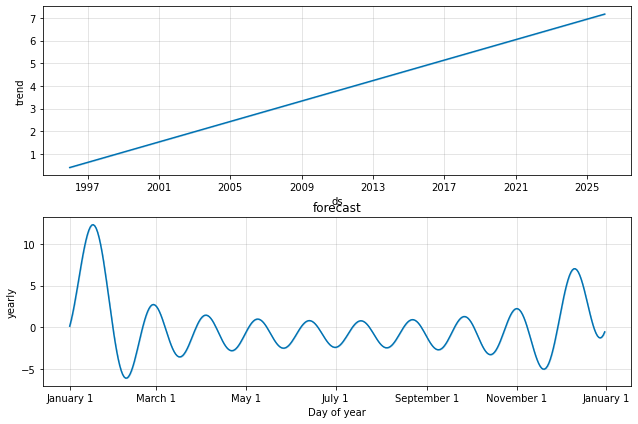

In [360]:
model.plot_components(forecast)
plt.title('forecast')

In [361]:
 forecast[['yhat','yhat_upper','yhat_lower']] = forecast[['yhat','yhat_upper','yhat_lower']].apply(lambda x: inv_boxcox(x, lam))

Text(0.5, 1.0, 'forecast')

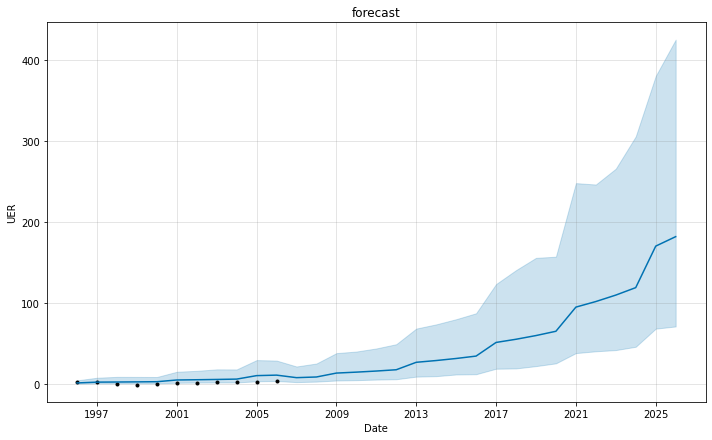

In [362]:
model.plot(forecast, xlabel = 'Date', ylabel = 'UER')
plt.title('forecast')

In [363]:
print(forecast)

           ds     trend  ...  multiplicative_terms_upper        yhat
0  1996-01-01  0.405523  ...                         0.0    1.116379
1  1997-01-01  0.631292  ...                         0.0    2.110124
2  1998-01-01  0.856443  ...                         0.0    2.255890
3  1999-01-01  1.081595  ...                         0.0    2.429141
4  2000-01-01  1.306746  ...                         0.0    2.634636
5  2001-01-01  1.532515  ...                         0.0    4.757161
6  2002-01-01  1.757666  ...                         0.0    5.062129
7  2003-01-01  1.982818  ...                         0.0    5.422988
8  2004-01-01  2.207969  ...                         0.0    5.848916
9  2005-01-01  2.433738  ...                         0.0   10.150752
10 2006-01-01  2.658889  ...                         0.0   10.757795
11 2006-12-31  2.883424  ...                         0.0    7.640334
12 2007-12-31  3.108575  ...                         0.0    8.463626
13 2008-12-31  3.334344  ...      

Text(0.5, 1.0, 'forecast')

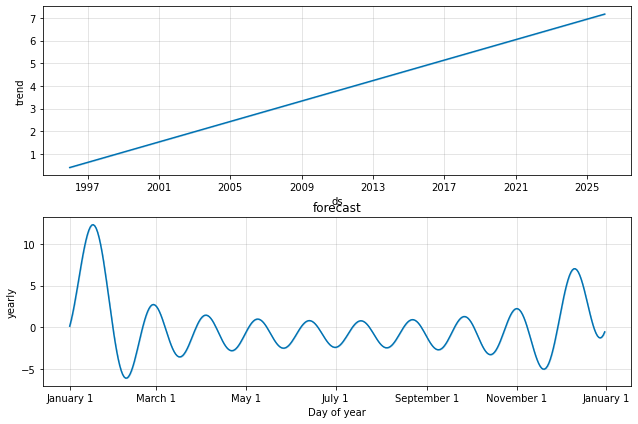

In [364]:
 model.plot_components(forecast)
plt.title('forecast')

In [365]:
cross_validation_results = cross_validation(model, horizon='365 days')
print(cross_validation_results)
 
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

INFO:fbprophet:Making 13 forecasts with cutoffs between 1999-01-03 00:00:00 and 2005-01-01 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.



           ds      yhat  yhat_lower  yhat_upper         y              cutoff
0  2000-01-01 -2.630909   -2.984896   -2.282068  0.183813 1999-01-03 00:00:00
1  2000-01-01 -2.630909   -2.976023   -2.286758  0.183813 1999-07-04 12:00:00
2  2001-01-01 -1.109736   -2.048876   -0.211806  0.660594 2000-01-03 00:00:00
3  2001-01-01 -1.109736   -2.019080   -0.217774  0.660594 2000-07-03 12:00:00
4  2002-01-01 -0.624480   -1.586606    0.344580  1.038605 2001-01-02 00:00:00
5  2002-01-01 -0.624480   -1.585114    0.380544  1.038605 2001-07-03 12:00:00
6  2003-01-01 -0.370523   -1.476768    0.697100  2.158658 2002-01-02 00:00:00
7  2003-01-01 -0.370523   -1.555868    0.740223  2.158658 2002-07-03 12:00:00
8  2004-01-01  0.677517   -0.632770    1.905105  2.037230 2003-01-02 00:00:00
9  2004-01-01  0.677517   -0.679771    1.966772  2.037230 2003-07-03 12:00:00
10 2005-01-01  1.346703    0.128392    2.662114  2.843034 2004-01-02 00:00:00
11 2005-01-01  1.346703    0.104171    2.746568  2.843034 2004-

In [366]:
print (performance_metrics_results.columns)

Index(['horizon', 'mse', 'rmse', 'mae', 'mape', 'mdape', 'coverage'], dtype='object')


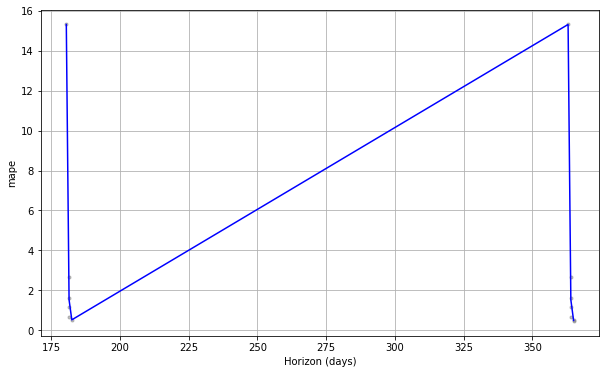

In [367]:
 
fig3 =plot_cross_validation_metric(cross_validation_results, metric='mape')